In [26]:
using EMIRT
using HDF5
using Images

In [27]:
img  = h5read("/usr/people/jingpeng/seungmount/research/kisuklee/Workbench/deep_learning/kaffe/datasets/pinky/ground_truth/vol34/img.h5", "main")
sgm1 = readsgm("/usr/people/jingpeng/seungmount/research/Jingpeng/17_pinky40/test/jknet/vol34_1-513_1-513_1-100.sgm.h5")
sgm2 = readsgm("/usr/people/jingpeng/seungmount/research/Jingpeng/17_pinky40/test/jknetlarge/vol34_1-513_1-513_1-100.sgm.h5")

EMIRT.SegMST(UInt32[0x00000001 0x00000001 … 0x00000018 0x00000018; 0x00000001 0x00000001 … 0x00000018 0x00000018; … ; 0x0000000a 0x0000000a … 0x00000051 0x00000051; 0x0000000a 0x0000000a … 0x00000051 0x00000051]

UInt32[0x00000001 0x00000001 … 0x00000018 0x00000018; 0x00000001 0x00000001 … 0x00000018 0x00000018; … ; 0x0000000a 0x0000000a … 0x00000051 0x00000051; 0x0000000a 0x0000000a … 0x00000051 0x00000051]

UInt32[0x00000002 0x00000002 … 0x00000018 0x00000018; 0x00000002 0x00000002 … 0x00000018 0x00000018; … ; 0x0000000a 0x0000000a … 0x00000051 0x00000051; 0x0000000a 0x0000000a … 0x00000051 0x00000051]

...

UInt32[0x000008cb 0x000008cb … 0x000008da 0x000008da; 0x000008cb 0x000008cb … 0x000008da 0x000008da; … ; 0x000006f3 0x000006f3 … 0x00000000 0x00000000; 0x000006f3 0x000006f3 … 0x00000000 0x00000000]

UInt32[0x000008cb 0x000008cb … 0x000008da 0x000008da; 0x000008cb 0x000008cb … 0x000008da 0x000008da; … ; 0x00000000 0x00000000 … 0x00000000 0x00000000; 0x00000000 0x00000000 … 0x0000

In [28]:
using Interact
using Compose

thd = 0.3
seg1 = merge(sgm1, thd)
seg2 = merge(sgm2, thd)
rgb1 = EMIRT.seg_overlay_img( img, seg1 )
rgb2 = EMIRT.seg_overlay_img( img, seg2 )
rgb1image = Image(rgb1, pixelspacing=[4,4,40], spatialorder=["x","y", "z"])
rgb2image = Image(rgb2, pixelspacing=[4,4,40], spatialorder=["x","y", "z"])
@manipulate for z in 1:size(img,3)   
    Compose.hstack(rgb1image[:,:,z], rgb2image[:,:,z])
end

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"z",50,1:100,true)

LoadError: MethodError: no method matching hstack(::Array{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2}, ::Array{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2})
Closest candidates are:
  hstack(::Any, ::Any, !Matched::Any, !Matched::Tuple{Compose.Context,Compose.VAlignment}...) at /usr/people/jingpeng/.julia/v0.5/Compose/src/stack.jl:15

In [35]:
using Images
rgb2image = Image(rgb2, pixelspacing=[4,4,40], spatialorder=["x","y", "z"])
using ImageView
ImageView.view(rgb2image)

(ImageCanvas,ImageSlice2d: zoom = Graphics.BoundingBox(0.0,513.0,0.0,513.0), z = 1)

In [34]:
using Images
rgb1image = Image(rgb1, pixelspacing=[4,4,40], spatialorder=["x","y", "z"])
using ImageView
ImageView.view(rgb1image)

(ImageCanvas,ImageSlice2d: zoom = Graphics.BoundingBox(0.0,513.0,0.0,513.0), z = 1)

In [31]:
 rand(Colors.RGB{U8}, 3,3)
RGB{U8}(0.3,0.2,0.1).r


UFixed{UInt8,8}(0.298)

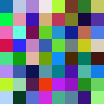

In [32]:
using ImageCore
img = colorview(RGB, rand(3, 8, 8))        # encodes as a 2d RGB{Float64} array

In [33]:
typeof(img)
size(img)

(8,8)